<a href="https://colab.research.google.com/github/GabrielWell/data-science-notebooks/blob/master/Introdu%C3%A7%C3%A3o_ao_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de avaliações de filmes, por notas de 0 à 5, classificados por seu nome, gênero e idioma

In [0]:
import pandas as pd

In [2]:
#Arquivo referente a notas dos filmes
notas = pd.read_csv('ratings.csv', sep = ',')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.shape
#Relação linhasxcolunas (a coluna índice não é contada)

(100836, 4)

In [4]:
#Alterar rótulos das colunas 
notas.columns = ['usuárioId', 'filmeId', 'nota', 'momento']
notas

,usuárioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [5]:
notas['nota']   #Considerado com uma Serie

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [6]:
#Retorna os valores únicos da coluna
notas['nota'].unique()    #As notas variam entre um desses valores

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [7]:
#Conta quantas vezes cada valor se repete (na coluna definida) e ordena do mais ao menos frequente 
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [8]:
print('Média: ', notas['nota'].mean())   #Cálculo da média (soma dos valores dividido pela quantidade)
print('Mediana: ', notas['nota'].median()) #Cálculo da mediana (valor em que pode partir metade dos valores pra baixo e outra metade pra cima)

Média:  3.501556983616962
Mediana:  3.5


In [9]:
#Outra forma de ler a coluna
notas.nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

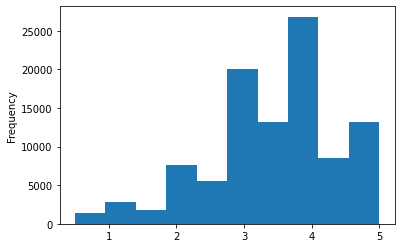

In [10]:
#Plotar um gráfico, definindo como tipo histograma
notas.nota.plot(kind='hist')

In [11]:
#Biblioteca de vizualização de resultados, instalando com pip para definir a versão desejada
import seaborn as sns

print(sns.__version__)

0.10.1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


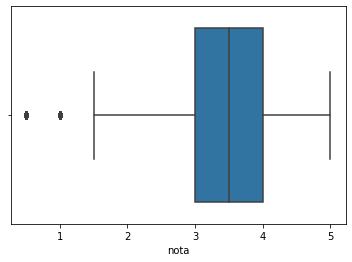

In [12]:
#Boxplot mostra a mediana e a porcentagem de valores que estão mais abaixo(esquerda) e mais acima(direita)
sns.boxplot(notas.nota)

# Analisando notas por filme

In [13]:
filmes = pd.read_csv('movies.csv', sep = ',')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
notas.head()

,usuárioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:
#Retornar a média das notas do filme com id determinado 
notas.query('filmeId == 1').nota.mean()   #Toy story

3.9209302325581397

In [16]:
notas.query('filmeId == 2').nota.mean() #Jumanji

3.4318181818181817

In [17]:
#Agrupar os itens, pela coluna passada por parâmetro, e tirar a média de cada um
notas.groupby('filmeId').mean()

,usuárioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [18]:
#Mesma média acima, mas extraindo somente a coluna nota e atribuindo à uma variável
medias_por_filme = notas.groupby('filmeId').mean()['nota']
medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

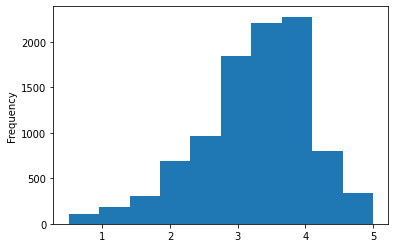

In [19]:
medias_por_filme.plot(kind='hist')

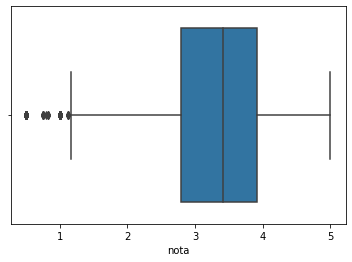

In [20]:
sns.boxplot(medias_por_filme)

In [21]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

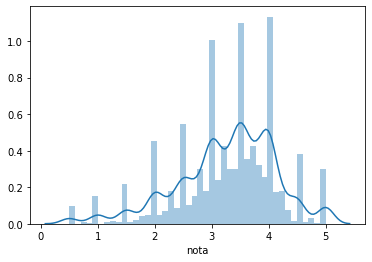

In [22]:
#Gráfico de distribuição
sns.distplot(medias_por_filme)

# Novo Dataset de filmes

In [23]:
#Arquivo com 5000 filmes, plataforma Kaggle
tmdb = pd.read_csv('tmdb_5000_movies.csv', sep=',')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [24]:
tmdb.original_language.unique()
#Categórica nominal (não possui uma ordem entre superior e inferior, maior e menor, etc)

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [25]:
tmdb['original_language'].value_counts()
#Interpretado como Serie

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
cs       2
ar       2
ro       2
id       2
ta       2
sl       1
xx       1
vi       1
is       1
pl       1
hu       1
no       1
te       1
nb       1
ky       1
ps       1
af       1
tr       1
el       1
Name: original_language, dtype: int64

In [26]:
#Transforma em DataFrame e cria uma nova coluna índice
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ko,11


In [27]:
#Alterar nomes das colunas
contagem_de_lingua.columns = ['lingua original', 'total']
contagem_de_lingua.head()

,lingua original,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


# Vizualização de dados

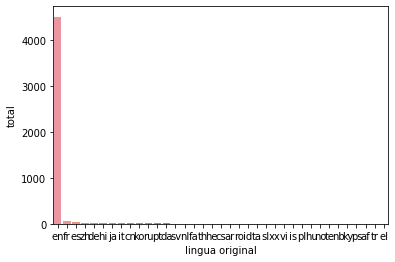

In [28]:
#Funçaõ do seaborn para plotar gráfico de barras (recebendo como params os dados que serão exibidos no eixo x, eixo y e a variável)
sns.barplot(x = 'lingua original', y = 'total', data = contagem_de_lingua)

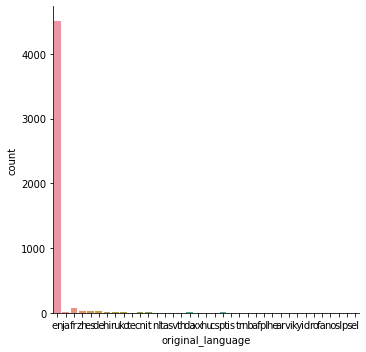

In [29]:
#Função que plota um gráfico de barras por categoria (de forma mais automática)
sns.catplot(x='original_language', kind='count', data=tmdb)   #Parâmetro que já faz a função do value_counts na coluna definida

# Analisando os filmes por idioma

In [30]:
#Contagem de todos os itens por língua
total_por_lingua = tmdb['original_language'].value_counts()
total_por_lingua.head()

en    4505
fr      70
es      32
zh      27
de      27
Name: original_language, dtype: int64

In [31]:
#Contagem geral
total_geral = total_por_lingua.sum()
total_geral


4803

In [32]:
#Contagem somente dos itens de inglês
total_de_ingles = total_por_lingua.loc["en"]
total_de_ingles

4505

In [33]:
#Resto das línguas (exceto inglês)
total_resto = total_geral - total_de_ingles
total_resto

298

In [34]:
#Resultados de filmes em inglês e de outras línguas
print(total_de_ingles, total_resto)

4505 298


In [35]:
#Criar dicionário em cima desses resultados
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_de_ingles, total_resto]
}
dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [36]:
#Criar dataframe utilizando o dicionário
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


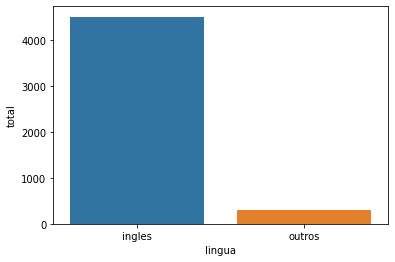

In [37]:
sns.barplot(x='lingua', y='total', data=dados)

In [0]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7ff91c467198>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

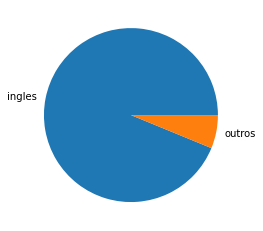

In [39]:
#Gráfico de torta (ou pizza)
plt.pie(dados['total'], labels=dados['lingua'])

In [40]:
total_filmes_nao_ingles = tmdb.query('original_language != "en" ')
total_filmes_nao_ingles

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,90414,"[{""id"": 187056, ""name"": ""woman director""}]",fr,"I Love You, Don't Touch Me!","The story of a 25 year old virgin girl, lookin...",0.020839,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-01-21,0,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just Your Typical Boy-Loves-Girl Who Doesn't L...,"I Love You, Don't Touch Me!",6.0,1
4751,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,42109,[],pt,"Gabriela, Cravo e Canela","In 1925, Gabriela becomes cook, mistress, and ...",0.557602,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",1983-03-24,0,99.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,Gabriela,6.0,2
4790,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""n...",NaN,13898,[],fa,دایره,Various women struggle to function in the oppr...,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...","[{""iso_3166_1"": ""IR"", ""name"": ""Iran""}]",2000-09-08,0,90.0,"[{""iso_639_1"": ""fa"", ""name"": ""\u0641\u0627\u06...",Released,NaN,The Circle,6.6,17
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",NaN,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of grueso

In [41]:
total_outros_filmes = total_filmes_nao_ingles.original_language.value_counts()
total_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
nl     4
fa     4
he     3
th     3
ta     2
ro     2
cs     2
ar     2
id     2
vi     1
te     1
sl     1
is     1
af     1
tr     1
el     1
pl     1
hu     1
no     1
ky     1
ps     1
xx     1
nb     1
Name: original_language, dtype: int64

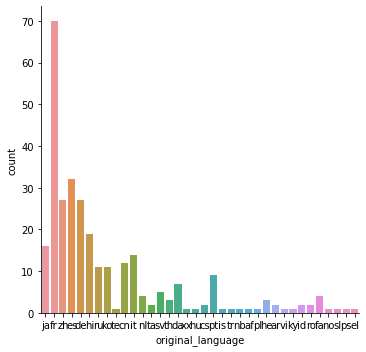

In [42]:
#Gerar gráfico para filmes que não sejam na língua inglesa
sns.catplot(x='original_language', kind='count', data=total_filmes_nao_ingles)

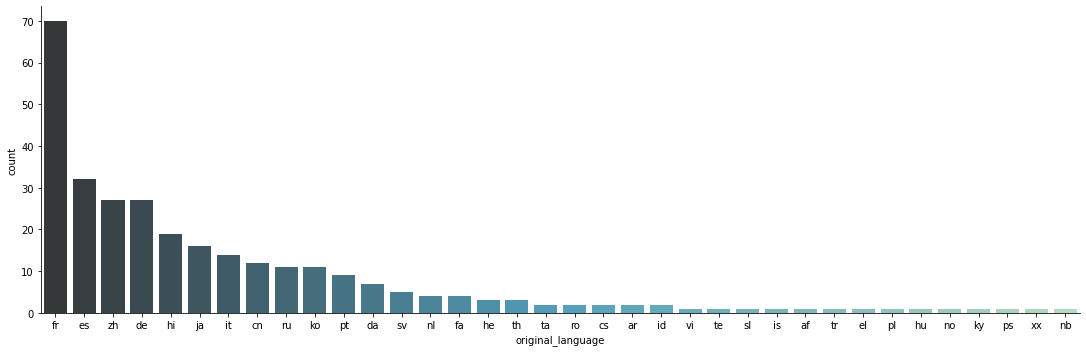

In [43]:
#Melhorar aparência do gráfico
sns.catplot(x='original_language', kind='count', data=total_filmes_nao_ingles, 
            aspect = 3,  #Tamanho do gráfico
            palette = 'GnBu_d',  #Plota em uma sequência organizada de cores (ver dococumentação do seaborn: Palette)
            order = total_outros_filmes.index   #Ordena pelo índice da variável definida
            )

In [44]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [45]:
notas_toy_story = notas.query('filmeId == 1')
notas_jumanji = notas.query('filmeId == 2')
print(len(notas_toy_story), len(notas_jumanji))

215 110


In [46]:
notas.head()

,usuárioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [47]:
#Exibir a média das notas com 2 casas decimais
print('Média das notas do Toy Story %.2f' % notas_toy_story.nota.mean())
print('Média das notas do Jumanji %.2f'%notas_jumanji.nota.mean())

Média das notas do Toy Story 3.92
Média das notas do Jumanji 3.43


In [48]:
#Desvio padrão (standard deviation)
print(notas_toy_story.nota.std(), notas_jumanji.nota.std())

0.8348591407114045 0.8817134921476455
